In [1]:
import pandas as pd
df = pd.read_csv('nvda.csv')

In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def load_data(url):
    return pd.read_csv(url, parse_dates=['Month'], index_col='Month')

def perform_adf_test(data):
    return adfuller(data.values)

def print_adf_results(adf_result):
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"p-value: {adf_result[1]:.4f}")
    print(f"Lags: {adf_result[2]}")
    print(f"Observations: {adf_result[3]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"  {key}: {value:.4f}")

def interpret_results(p_value):
    return "stationary (reject H₀)" if p_value < 0.05 else "non-stationary (fail to reject H₀)"

if __name__ == "__main__":
    url = "airline-passengers.csv"
    df = load_data(url)
    adf_result = perform_adf_test(df)
    print_adf_results(adf_result)
    print(f"The time series is {interpret_results(adf_result[1])}.")

Augmented Dickey-Fuller Test Results:
ADF Statistic: 0.8154
p-value: 0.9919
Lags: 13
Observations: 130
Critical Values:
  1%: -3.4817
  5%: -2.8840
  10%: -2.5788
The time series is non-stationary (fail to reject H₀).


In [5]:
#Differencing
df_diff = df.diff().dropna()

#Log Transform
df_log = np.log(df)

adf_result_diff = adfuller(df_diff)
print(f"ADF Statistic after Differencing: {adf_result_diff[0]}")
print(f"p-value after Differencing: {adf_result_diff[1]}")

adf_result_log = adfuller(df_log)
print(f"ADF Statistic after Log: {adf_result_log[0]}")
print(f"p-value after Log: {adf_result_log[1]}")

ADF Statistic after Differencing: -2.8292668241699994
p-value after Differencing: 0.0542132902838255
ADF Statistic after Log: -1.7170170891069607
p-value after Log: 0.42236677477039125


In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Example Time Series
y_true = np.array([10, 12, 13, 14, 15])
y_pred_naive = np.roll(y_true, 1)  # Shift values by 1 as naive forecast
y_pred_naive[0] = y_true[0]  # No forecast for the first observation

# Calculate MAE for Naive Forecast
mae_naive = mean_absolute_error(y_true[1:], y_pred_naive[1:])
print(f"MAE (Naive Forecast): {mae_naive:.4f}")

MAE (Naive Forecast): 1.2500


In [8]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def simple_moving_average(y, window_size):
    return np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Example Time Series
y_true = np.array([10, 12, 14, 16, 18, 20])
window_size = 2

y_pred_sma = simple_moving_average(y_true, window_size)

# Align y_true and predictions
y_true_trim = y_true[window_size - 1:]

mae_sma = mean_absolute_error(y_true_trim, y_pred_sma)
print(f"MAE (Simple Moving Average): {mae_sma:.4f}")

MAE (Simple Moving Average): 1.0000


In [10]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Example Time Series
y_true = np.array([10, 12, 15, 18, 20])
y_pred = np.array([11, 13, 14, 17, 21])

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 1.0


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Example Time Series
y_true = np.array([10, 12, 15, 18, 20])
y_pred = np.array([11, 13, 14, 17, 21])

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 1.0


In [12]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Example Time Series
y_true = np.array([10, 12, 15, 18, 20])
y_pred = np.array([11, 13, 14, 17, 21])

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 7.11%


In [14]:
import numpy as np

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_true)
    mae = np.mean(np.abs(y_true - y_pred))
    naive_mae = np.mean(np.abs(np.diff(y_train)))  # In-sample one-step naive forecast
    return mae / naive_mae if naive_mae != 0 else np.nan  # Avoid division by zero

# Example Time Series
y_true = np.array([10, 12, 15, 18, 20])
y_pred = np.array([11, 13, 14, 17, 21])

# Calculate MASE
mase = mean_absolute_scaled_error(y_true, y_pred, y_train=y_true)
print(f"Mean Absolute Scaled Error (MASE): {mase}")


Mean Absolute Scaled Error (MASE): 0.4


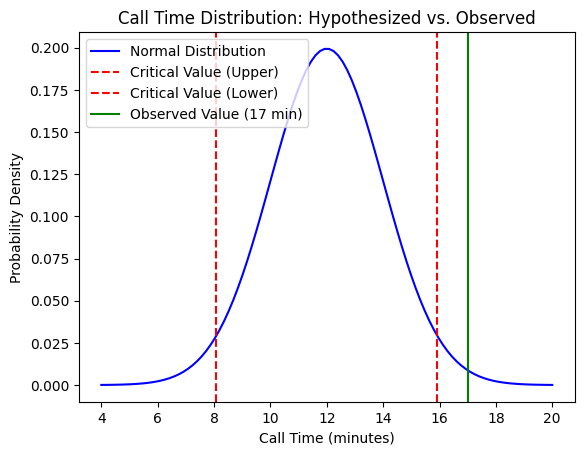

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
mean = 12
std_dev = 2
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution
plt.plot(x, y, label="Normal Distribution", color="blue")

# Add critical values (±1.96 standard deviations)
plt.axvline(mean + 1.96 * std_dev, color="red", linestyle="--", label="Critical Value (Upper)")
plt.axvline(mean - 1.96 * std_dev, color="red", linestyle="--", label="Critical Value (Lower)")

# Add observed value (17 minutes)
plt.axvline(17, color="green", linestyle="-", label="Observed Value (17 min)")

plt.title("Call Time Distribution: Hypothesized vs. Observed")
plt.xlabel("Call Time (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.savefig("call_time_dist.png")
plt.show()

In [18]:
import scipy.stats as stats
# Calculate confidence interval
n = 30
sample_mean = 17
sample_std = 2
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 1)
margin_of_error = t_critical * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
print(f"Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval: (16.25, 17.75)


In [20]:
import statistics as stats
import math

# Define the data list
data = [10, 20, 30, 40, 50]  # Example dataset

mean = sum(data) / len(data)
print(f"Mean: {mean}")

squared_deviations = [(x - mean) ** 2 for x in data]
variance = sum(squared_deviations) / len(data)
std_dev = math.sqrt(variance)

print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")


Mean: 30.0
Variance: 200.0
Standard Deviation: 14.142135623730951


In [21]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import poisson

# Poisson Example: Probability of exactly 3 yellow cards in a game

lambda_value = 2 # Average number of yellow cards per game

k = 3 # Number of yellow cards to calculate probability for

# Calculating the probability using Pois.

poisson_prob = poisson.pmf(k, lambda_value)

# Visualizing Poisson Distribution

x_poisson = np.arange(0, 10) # Values from 0 to 10 (possible number of y_poisson = poisson.pmf(x_poisson, lambda_value)

'''Result: 0.18044704431548358'''

'Result: 0.18044704431548358'

# Mine

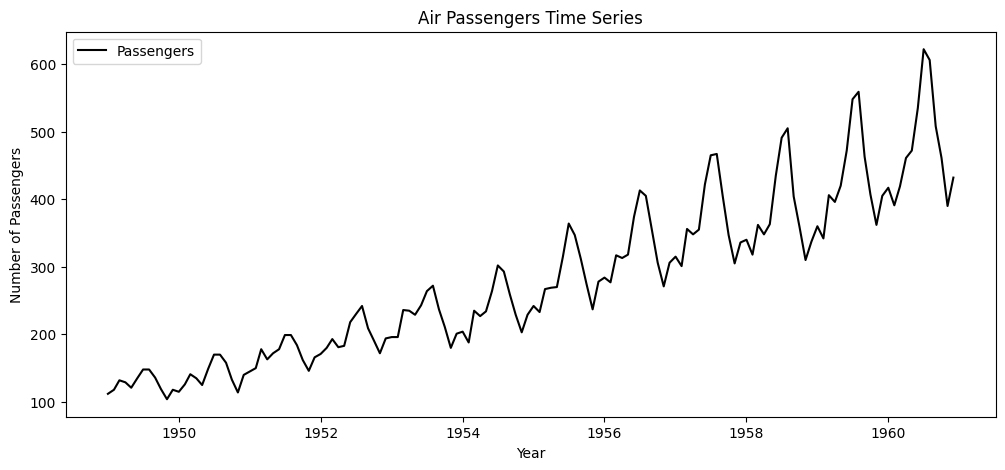

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv("airline-passengers.csv", parse_dates=["Month"], index_col="Month")
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)

# Plot the original time series
plt.figure(figsize=(12, 5))
plt.plot(df, label="Passengers", color="black")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("Air Passengers Time Series")
plt.legend()
plt.show()


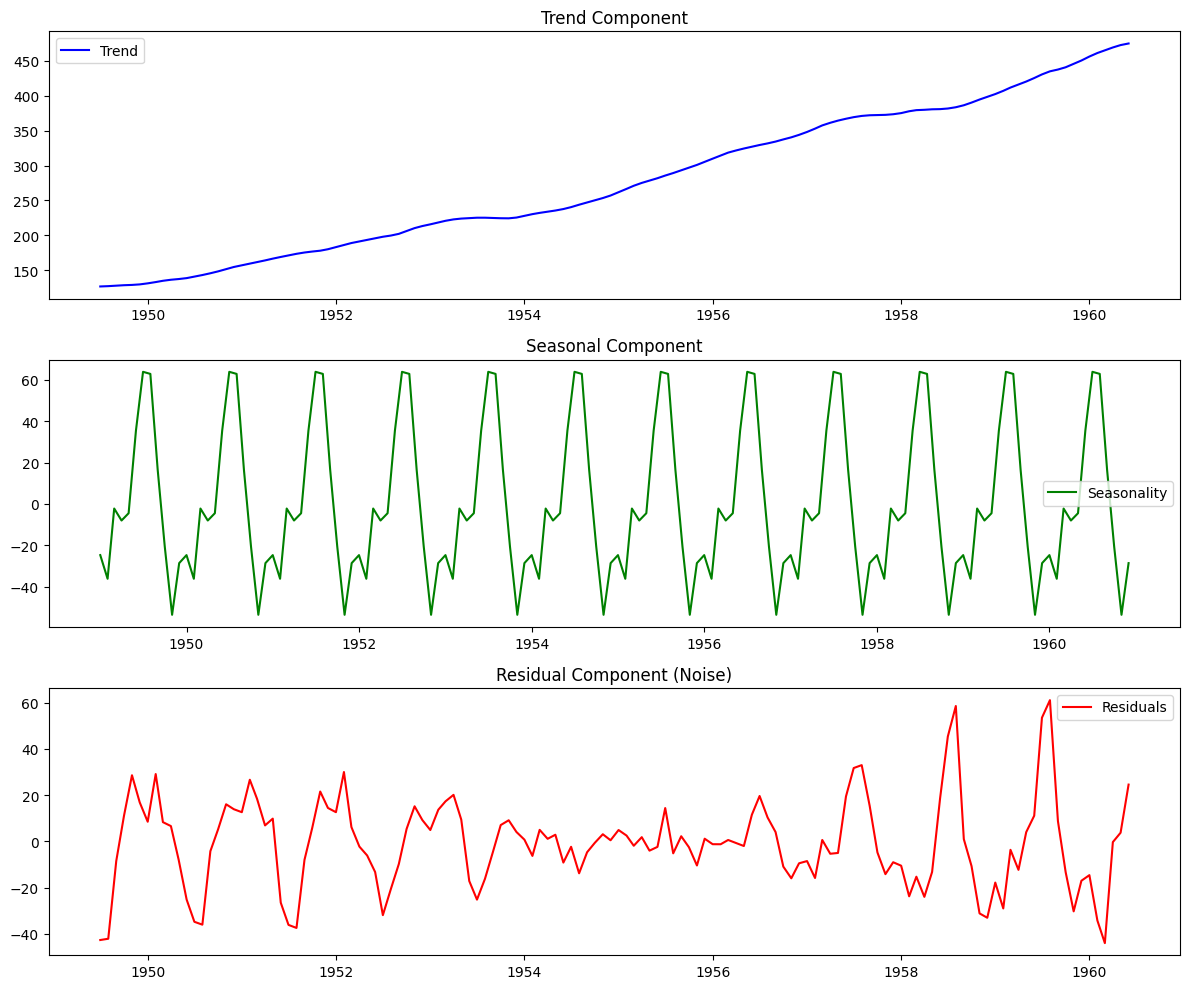

In [2]:
# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(df["Passengers"])

# Plot the components
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

ax[0].plot(decomposition.trend, label="Trend", color="blue")
ax[0].set_title("Trend Component")
ax[0].legend()

ax[1].plot(decomposition.seasonal, label="Seasonality", color="green")
ax[1].set_title("Seasonal Component")
ax[1].legend()

ax[2].plot(decomposition.resid, label="Residuals", color="red")
ax[2].set_title("Residual Component (Noise)")
ax[2].legend()

plt.tight_layout()
plt.show()


In [12]:
# Perform Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is NOT stationary. Differencing may be required.")

adf_test(df["Passengers"])


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The time series is NOT stationary. Differencing may be required.


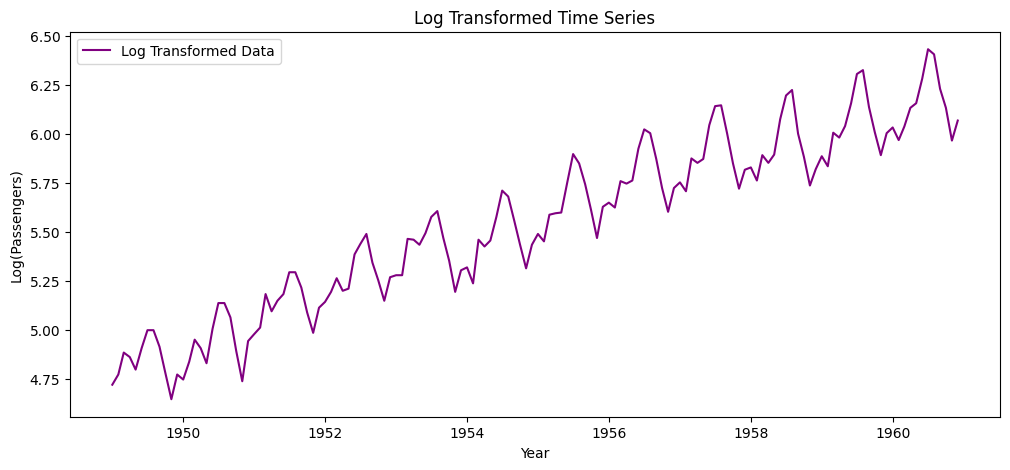

In [4]:
df["Log_Passengers"] = np.log(df["Passengers"])

plt.figure(figsize=(12, 5))
plt.plot(df["Log_Passengers"], label="Log Transformed Data", color="purple")
plt.xlabel("Year")
plt.ylabel("Log(Passengers)")
plt.title("Log Transformed Time Series")
plt.legend()
plt.show()


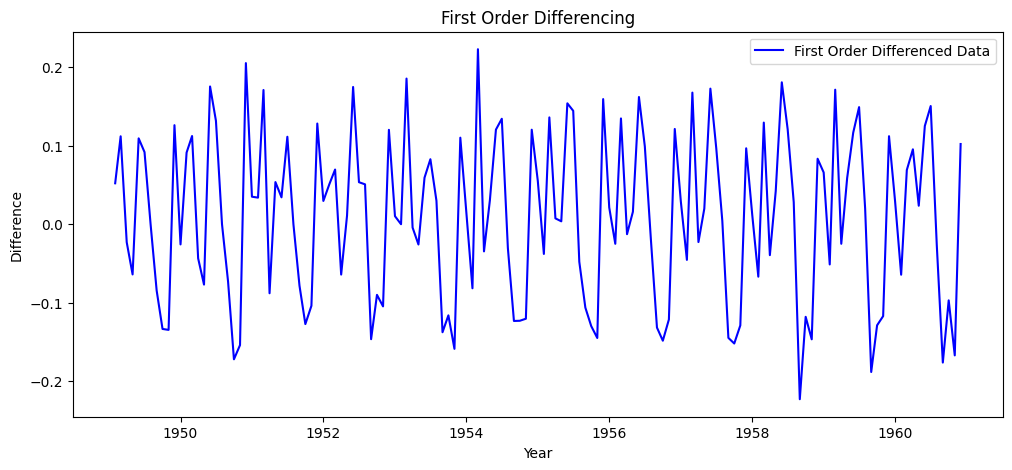

ADF Statistic: -2.717130598388133
p-value: 0.07112054815085875
Critical Values: {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
The time series is NOT stationary. Differencing may be required.


In [5]:
df["First_Diff"] = df["Log_Passengers"].diff().dropna()

plt.figure(figsize=(12, 5))
plt.plot(df["First_Diff"], label="First Order Differenced Data", color="blue")
plt.xlabel("Year")
plt.ylabel("Difference")
plt.title("First Order Differencing")
plt.legend()
plt.show()

# ADF Test on Differenced Data
adf_test(df["First_Diff"].dropna())


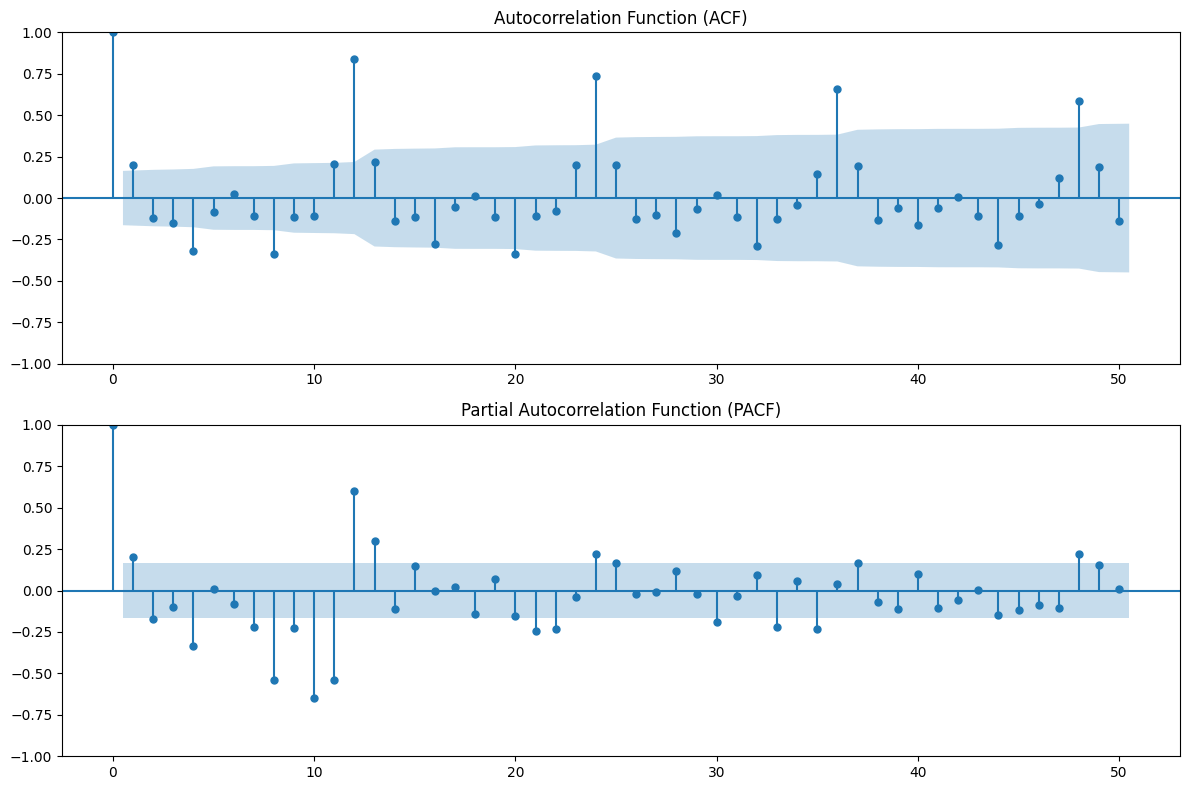

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df["First_Diff"].dropna(), ax=ax[0], lags=50)  # ACF plot
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df["First_Diff"].dropna(), ax=ax[1], lags=50, method="ols")  # PACF plot
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [7]:
# Fit ARIMA model (p, d, q) - values selected based on ACF & PACF plots
model = ARIMA(df["Log_Passengers"], order=(2,1,2))  # Example (p=2, d=1, q=2)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


C:\Users\Aneesh Mada\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Aneesh Mada\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Aneesh Mada\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Log_Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Mon, 24 Feb 2025   AIC                           -247.780
Time:                        23:24:03   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2431      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.4

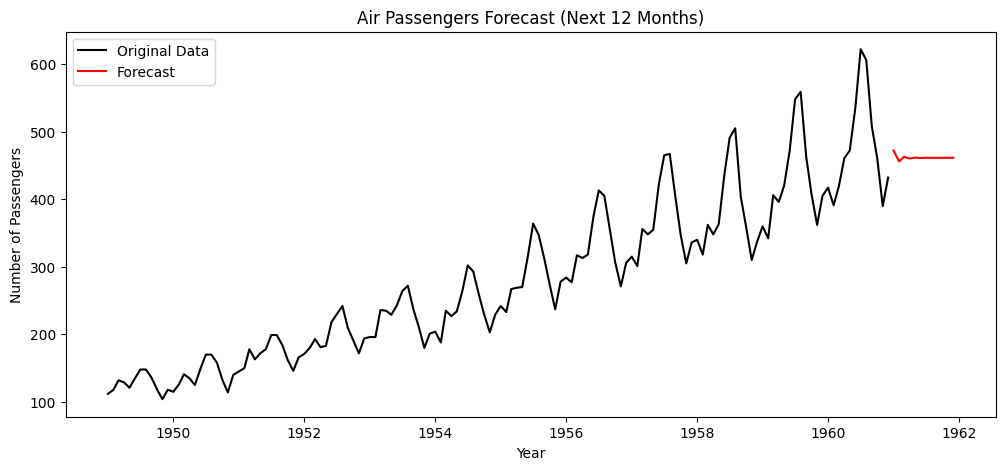

In [8]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Convert forecast back from log scale
forecast_exp = np.exp(forecast)

# Plot the original data and forecasted values
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Passengers"], label="Original Data", color="black")
plt.plot(pd.date_range(df.index[-1], periods=12, freq="M"), forecast_exp, label="Forecast", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("Air Passengers Forecast (Next 12 Months)")
plt.legend()
plt.show()


Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  0.689022    0.99997
Durbin-Watson Statistic: 1.0312737207962368


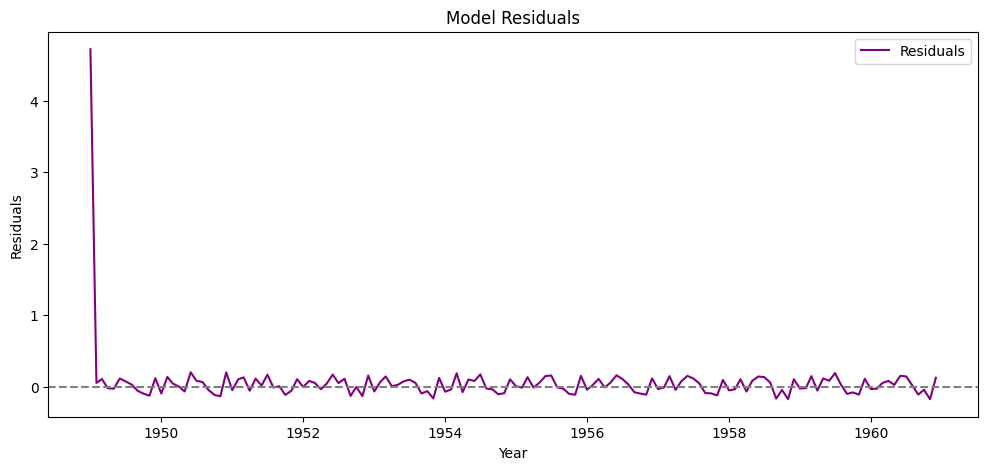

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson

# Extract residuals
residuals = model_fit.resid

# Ljung-Box Test for randomness of residuals
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", ljung_box)

# Durbin-Watson Test for autocorrelation
dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)

# Plot residuals
plt.figure(figsize=(12, 5))
plt.plot(residuals, label="Residuals", color="purple")
plt.axhline(y=0, linestyle="--", color="gray")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Model Residuals")
plt.legend()
plt.show()


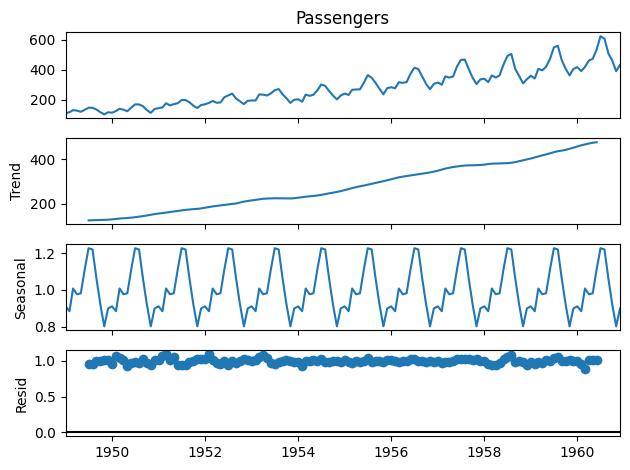

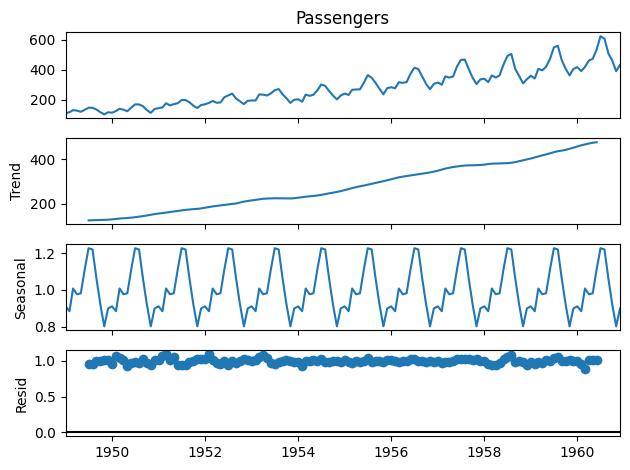

In [7]:
decomposition = seasonal_decompose(df["Passengers"], model = "multiplicative")
decomposition.plot()